# Summary

For figure 2F, we first get the top 20 significant markers in expression profile and splicing profile, respectively. 

Then we plot Venn to compare different top 20 markers.

# Content

* get top 20 markers for splicing profile
* get top 20 markers for expression profile
* plot venn diagram
* plot example

## get top 20 markers for splicing profile

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import scanpy as sc
import numpy as np
import pandas as pd

In [4]:
adata=sc.read('/storage/yhhuang/users/ruiyan/15organ/SRR13075718_scTSS_change_output/count/scTSS_count_all.h5ad')
adata

AnnData object with n_obs × n_vars = 7572 × 9670
    obs: 'new_cluster', 'Cell_type_in_merged_data', 'Cell_type_in_each_tissue', 'seurat_clusters', 'tSNE_1', 'tSNE_2'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    obsm: 'X_tsne'

In [5]:
transcriptadata=sc.read('/storage/yhhuang/users/ruiyan/15organ/SRR13075718/SRR13075718_transcription.h5ad')
transcriptadata

AnnData object with n_obs × n_vars = 7572 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster'
    var: 'gene_ids', 'feature_types'
    uns: 'new_cluster_colors'
    obsm: 'X_tsne'

In [6]:
adata=adata[transcriptadata.obs.index,:]
adata

View of AnnData object with n_obs × n_vars = 7572 × 9670
    obs: 'new_cluster', 'Cell_type_in_merged_data', 'Cell_type_in_each_tissue', 'seurat_clusters', 'tSNE_1', 'tSNE_2'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    obsm: 'X_tsne'

In [7]:
adata.obsm['X_tsne']=transcriptadata.obsm['X_tsne']
adata

AnnData object with n_obs × n_vars = 7572 × 9670
    obs: 'new_cluster', 'Cell_type_in_merged_data', 'Cell_type_in_each_tissue', 'seurat_clusters', 'tSNE_1', 'tSNE_2'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    obsm: 'X_tsne'

In [8]:
adata.obs=transcriptadata.obs.copy()
adata

AnnData object with n_obs × n_vars = 7572 × 9670
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    obsm: 'X_tsne'

In [9]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

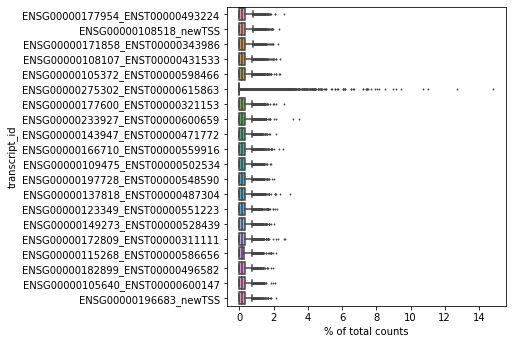

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [11]:
sc.pp.filter_genes(adata, min_cells=3)

In [12]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

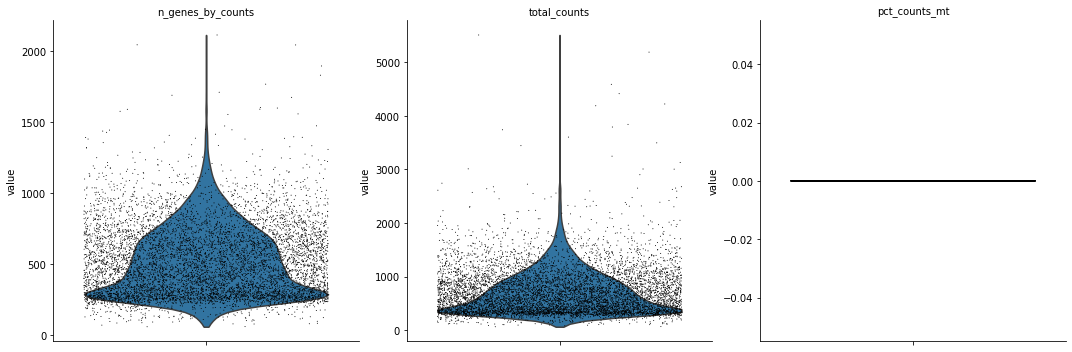

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

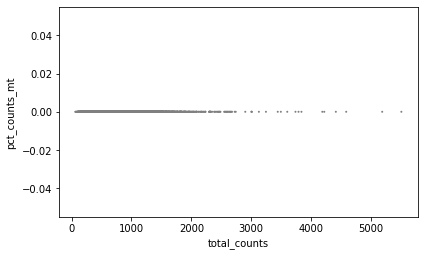

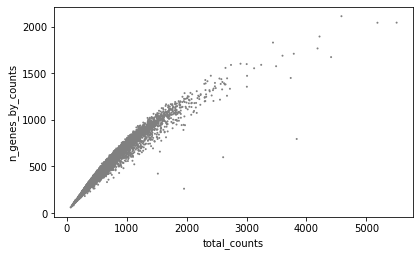

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
adata

AnnData object with n_obs × n_vars = 7572 × 9668
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_tsne'

In [16]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [17]:
adata

View of AnnData object with n_obs × n_vars = 7572 × 9668
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_tsne'

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [19]:
sc.pp.log1p(adata)

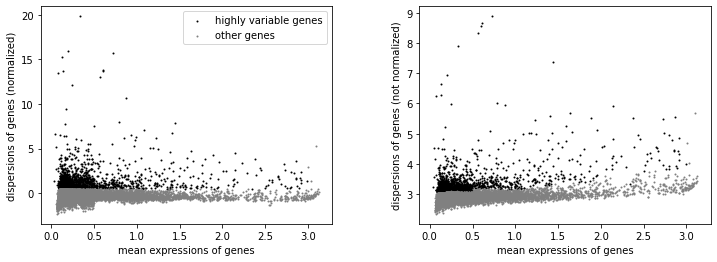

In [20]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.pl.highly_variable_genes(adata)

In [21]:
adata.raw = adata

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [23]:
sc.pp.scale(adata, max_value=10)

In [24]:
sc.tl.pca(adata, svd_solver='arpack')

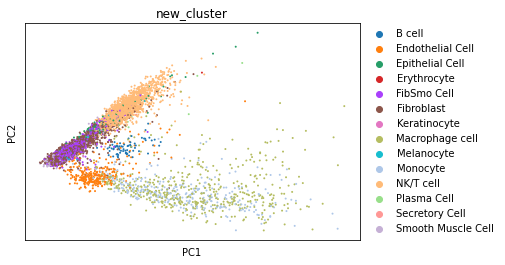

In [25]:
sc.pl.pca(adata, color='new_cluster')

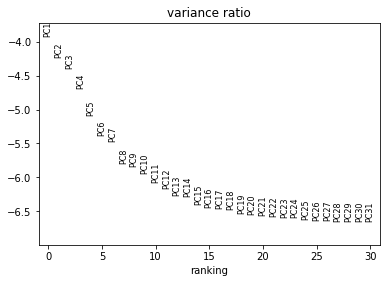

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

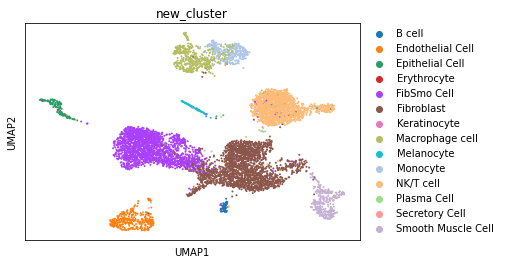

In [28]:
sc.tl.umap(adata)

sc.pl.umap(adata, color=['new_cluster'])

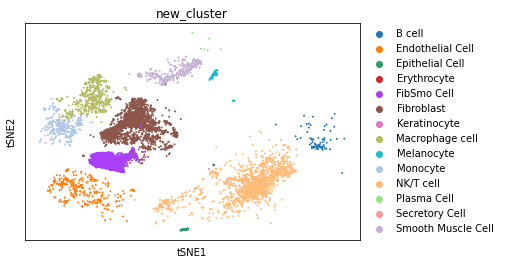

In [29]:
sc.pl.tsne(adata, color=['new_cluster'])


In [30]:
adata.obs['new_cluster'].value_counts()

Fibroblast            2168
FibSmo Cell           1979
NK/T cell             1718
Macrophage cell        498
Smooth Muscle Cell     314
Endothelial Cell       312
Monocyte               308
Epithelial Cell        127
Melanocyte              70
B cell                  68
Plasma Cell              6
Secretory Cell           2
Erythrocyte              1
Keratinocyte             1
Name: new_cluster, dtype: int64

In [31]:
adata=adata[~adata.obs['new_cluster'].isin(['Melanocyte','B cell','Plasma Cell','Secretory Cell','Erythrocyte','Keratinocyte'])]
adata

View of AnnData object with n_obs × n_vars = 7424 × 9668
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'new_cluster_colors', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

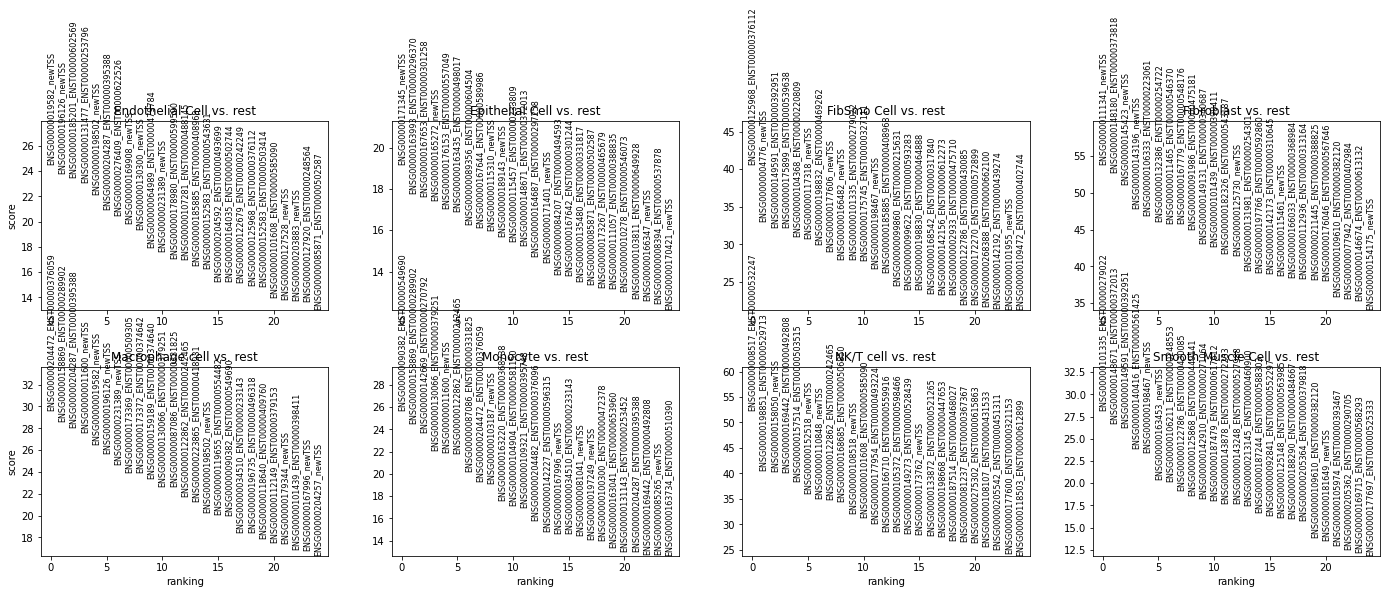

In [32]:
sc.tl.rank_genes_groups(adata, 'new_cluster', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,Endothelial Cell_n,Endothelial Cell_p,Epithelial Cell_n,Epithelial Cell_p,FibSmo Cell_n,FibSmo Cell_p,Fibroblast_n,Fibroblast_p,Macrophage cell_n,Macrophage cell_p,Monocyte_n,Monocyte_p,NK/T cell_n,NK/T cell_p,Smooth Muscle Cell_n,Smooth Muscle Cell_p
0,ENSG00000019582_newTSS,1.210902e-132,ENSG00000171345_newTSS,5.558870e-82,ENSG00000125968_ENST00000376112,0.000000e+00,ENSG00000111341_newTSS,0.0,ENSG00000204472_ENST00000376059,3.862182e-193,ENSG00000090382_ENST00000549690,7.447598e-146,ENSG00000008517_ENST00000532247,0.0,ENSG00000101335_ENST00000279022,6.795253e-175
1,ENSG00000196126_newTSS,2.736487e-125,ENSG00000163993_ENST00000296370,9.711214e-71,ENSG00000004776_newTSS,6.940489e-239,ENSG00000148180_ENST00000373818,0.0,ENSG00000158869_ENST00000289902,9.499853e-180,ENSG00000158869_ENST00000289902,6.929917e-133,ENSG00000198851_ENST00000529713,0.0,ENSG00000148671_ENST00000372013,4.301269e-157
2,ENSG00000185201_ENST00000602569,2.169360e-121,ENSG00000167653_ENST00000301258,1.192496e-69,ENSG00000149591_ENST00000392951,1.199022e-227,ENSG00000145423_newTSS,0.0,ENSG00000204287_ENST00000395388,5.177030e-173,ENSG00000142669_ENST00000270792,1.645883e-124,ENSG00000158050_newTSS,0.0,ENSG00000149591_ENST00000392951,1.235548e-151
3,ENSG00000131477_ENST00000253796,7.726895e-118,ENSG00000165272_newTSS,3.756313e-68,ENSG00000175899_ENST00000539638,1.611275e-227,ENSG00000143196_newTSS,0.0,ENSG00000011600_newTSS,3.791236e-168,ENSG00000130066_ENST00000379251,7.773134e-108,ENSG00000169442_ENST00000492808,0.0,ENSG00000140416_ENST00000561425,7.564579e-126
4,ENSG00000198502_newTSS,2.437297e-108,ENSG00000176153_ENST00000557049,5.130618e-65,ENSG00000104368_ENST00000220809,3.306187e-211,ENSG00000106333_ENST00000223061,0.0,ENSG00000019582_newTSS,2.384006e-154,ENSG00000011600_newTSS,1.590552e-106,ENSG00000157514_ENST00000503515,0.0,ENSG00000198467_newTSS,9.974732e-122


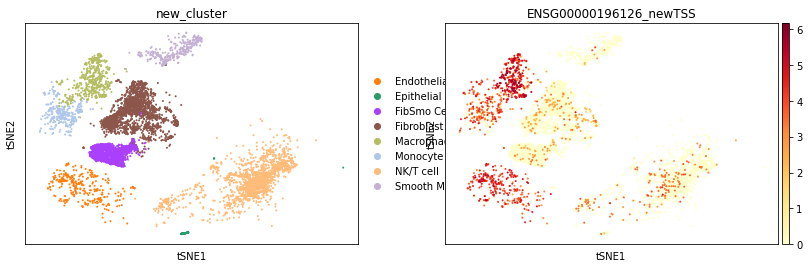

In [34]:
sc.pl.tsne(adata, color=['new_cluster','ENSG00000196126_newTSS'],color_map='YlOrRd')

In [35]:
splicingdf=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
splicingdf

,Endothelial Cell_n,Endothelial Cell_p,Epithelial Cell_n,Epithelial Cell_p,FibSmo Cell_n,FibSmo Cell_p,Fibroblast_n,Fibroblast_p,Macrophage cell_n,Macrophage cell_p,Monocyte_n,Monocyte_p,NK/T cell_n,NK/T cell_p,Smooth Muscle Cell_n,Smooth Muscle Cell_p
0,ENSG00000019582_newTSS,1.210902e-132,ENSG00000171345_newTSS,5.558870e-82,ENSG00000125968_ENST00000376112,0.000000e+00,ENSG00000111341_newTSS,0.000000e+00,ENSG00000204472_ENST00000376059,3.862182e-193,ENSG00000090382_ENST00000549690,7.447598e-146,ENSG00000008517_ENST00000532247,0.000000e+00,ENSG00000101335_ENST00000279022,6.795253e-175
1,ENSG00000196126_newTSS,2.736487e-125,ENSG00000163993_ENST00000296370,9.711214e-71,ENSG00000004776_newTSS,6.940489e-239,ENSG00000148180_ENST00000373818,0.000000e+00,ENSG00000158869_ENST00000289902,9.499853e-180,ENSG00000158869_ENST00000289902,6.929917e-133,ENSG00000198851_ENST00000529713,0.000000e+00,ENSG00000148671_ENST00000372013,4.301269e-157
2,ENSG00000185201_ENST00000602569,2.169360e-121,ENSG00000167653_ENST00000301258,1.192496e-69,ENSG00000149591_ENST00000392951,1.199022e-227,ENSG00000145423_newTSS,0.000000e+00,ENSG00000204287_ENST00000395388,5.177030e-173,ENSG00000142669_ENST00000270792,1.645883e-124,ENSG00000158050_newTSS,0.000000e+00,ENSG00000149591_ENST00000392951,1.235548e-151
3,ENSG00000131477_ENST00000253796,7.726895e-118,ENSG00000165272_newTSS,3.756313e-68,ENSG00000175899_ENST00000539638,1.611275e-227,ENSG00000143196_newTSS,0.000000e+00,ENSG00000011600_newTSS,3.791236e-168,ENSG00000130066_ENST00000379251,7.773134e-108,ENSG00000169442_ENST00000492808,0.000000e+00,ENSG00000140416_ENST00000561425,7.564579e-126
4,ENSG00000198502_newTSS,2.437297e-108,ENSG00000176153_ENST00000557049,5.130618e-65,ENSG00000104368_ENST00000220809,3.306187e-211,ENSG00000106333_ENST00000223061,0.000000e+00,ENSG00000019582_newTSS,2.384006e-154,ENSG00000011600_newTSS,1.590552e-106,ENSG00000157514_ENST00000503515,0.000000e+00,ENSG00000198467_newTSS,9.974732e-122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,ENSG00000004776_newTSS,1.209797e-33,ENSG00000198832_ENST00000469262,2.205492e-14,ENSG00000135046_ENST00000468639,7.313519e-115,ENSG00000008517_ENST00000532247,3.076292e-91,ENSG00000111678_ENST00000229281,5.370869e-55,ENSG00000117318_newTSS,3.077270e-40,ENSG00000068697_newTSS,3.140707e-226,ENSG00000087245_ENST00000219070,8.622194e-27
9664,ENSG00000142173_ENST00000310645,3.091086e-34,ENSG00000185885_ENST00000408968,1.140172e-19,ENSG00000122862_ENST00000242465,2.392596e-128,ENSG00000101608_ENST00000585090,2.843183e-96,ENSG00000132386_ENST00000254722,7.536430e-56,ENSG00000111678_ENST00000229281,1.331330e-43,ENSG00000131981_ENST00000254301,1.203179e-231,ENSG00000077942_ENST00000402984,3.529394e-28
9665,ENSG00000132386_ENST00000254722,2.889426e-34,ENSG00000026025_ENST00000224237,2.464056e-21,ENSG00000034510_ENST00000233143,1.554979e-160,ENSG00000108518_newTSS,3.917966e-111,ENSG00000142173_ENST00000310645,1.035883e-56,ENSG00000198832_ENST00000469262,2.147424e-46,ENSG00000117318_newTSS,1.956754e-238,ENSG00000132386_ENST00000254722,1.954666e-28
9666,ENSG00000167996_newTSS,8.122759e-40,ENSG00000185201_ENST00000602569,1.496955e-22,ENSG00000213145_ENST00000460900,7.567785e-161,ENSG00000166710_ENST00000559916,2.166601e-123,ENSG00000198832_ENST00000469262,1.446008e-60,ENSG00000170315_ENST00000578649,5.735399e-48,ENSG00000101439_ENST00000398411,1.194633e-284,ENSG00000008394_ENST00000537878,1.897919e-31


In [ ]:
splicingdf.to_csv('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/splicing_wilcoxon_allpvalue.csv')
adata.write('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/splicing_preprocessed.h5ad')

# Expression profile

In [36]:
import pandas as pd
import scanpy as sc

In [37]:
transcriptadata=sc.read('/storage/yhhuang/users/ruiyan/15organ/SRR13075718/SRR13075718_transcription.h5ad')
transcriptadata

AnnData object with n_obs × n_vars = 7572 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster'
    var: 'gene_ids', 'feature_types'
    uns: 'new_cluster_colors'
    obsm: 'X_tsne'

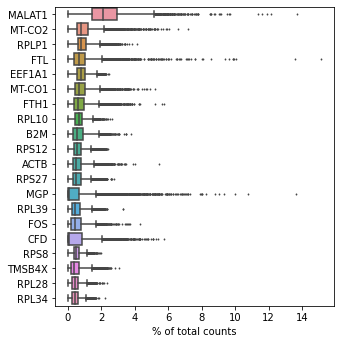

In [38]:
sc.pl.highest_expr_genes(transcriptadata, n_top=20, )

In [39]:
sc.pp.filter_cells(transcriptadata, min_genes=200)
sc.pp.filter_genes(transcriptadata, min_cells=3)

In [40]:
transcriptadata

AnnData object with n_obs × n_vars = 7572 × 19433
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'new_cluster_colors'
    obsm: 'X_tsne'

In [41]:
transcriptadata.var['mt'] = transcriptadata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(transcriptadata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


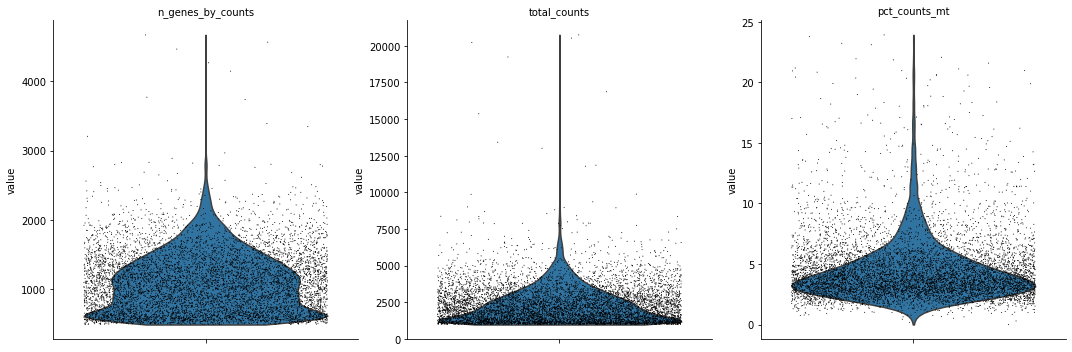

In [42]:
sc.pl.violin(transcriptadata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


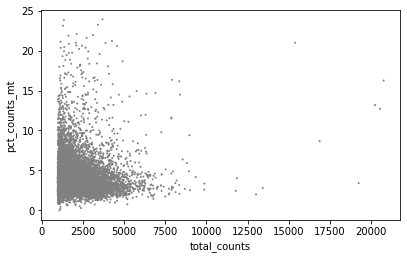

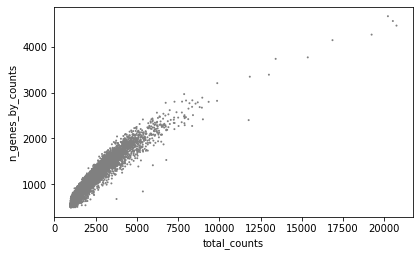

In [43]:
sc.pl.scatter(transcriptadata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(transcriptadata, x='total_counts', y='n_genes_by_counts')

In [44]:

sc.pp.normalize_total(transcriptadata, target_sum=1e4)

In [45]:
sc.pp.log1p(transcriptadata)

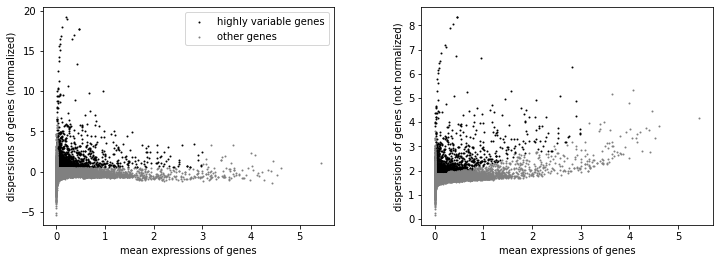

In [46]:
sc.pp.highly_variable_genes(transcriptadata, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.pl.highly_variable_genes(transcriptadata)

In [47]:
transcriptadata.raw = transcriptadata

In [48]:
sc.pp.regress_out(transcriptadata, ['total_counts', 'pct_counts_mt'])


In [49]:
sc.pp.scale(transcriptadata, max_value=10)

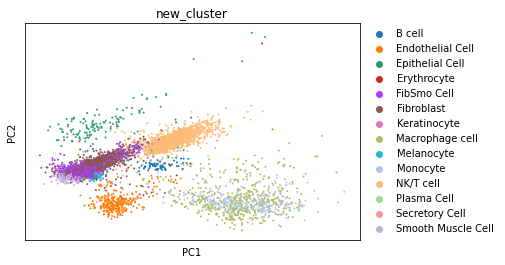

In [50]:
sc.tl.pca(transcriptadata, svd_solver='arpack')
sc.pl.pca(transcriptadata, color='new_cluster')

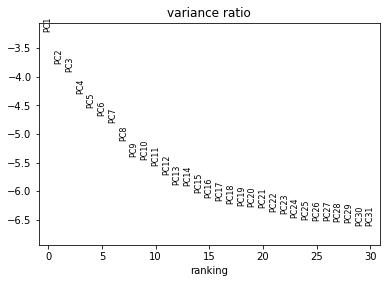

In [51]:
sc.pl.pca_variance_ratio(transcriptadata, log=True)

In [52]:
sc.pp.neighbors(transcriptadata, n_neighbors=10, n_pcs=40)

In [53]:
sc.tl.umap(transcriptadata)

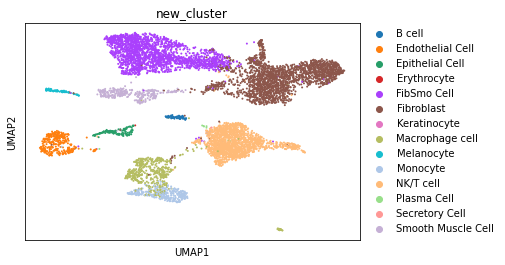

In [54]:
sc.pl.umap(transcriptadata, color=['new_cluster'])

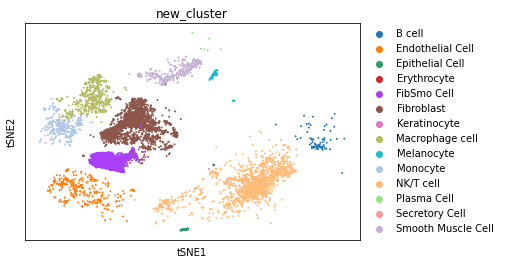

In [55]:
sc.pl.tsne(transcriptadata, color=['new_cluster'])

In [56]:
transcriptadata=transcriptadata[~transcriptadata.obs['new_cluster'].isin(['Melanocyte','B cell','Plasma Cell','Secretory Cell','Erythrocyte','Keratinocyte'])]
transcriptadata

View of AnnData object with n_obs × n_vars = 7424 × 19433
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'new_cluster_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

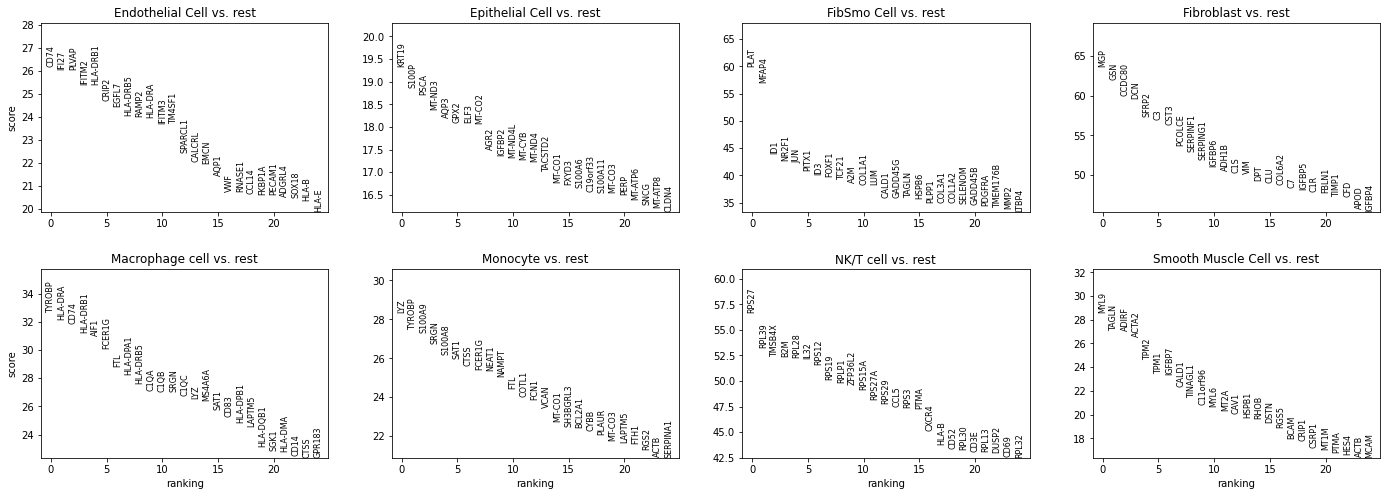

In [57]:
sc.tl.rank_genes_groups(transcriptadata, 'new_cluster', method='wilcoxon')
sc.pl.rank_genes_groups(transcriptadata, n_genes=25, sharey=False)

In [58]:
result = transcriptadata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,Endothelial Cell_n,Endothelial Cell_p,Epithelial Cell_n,Epithelial Cell_p,FibSmo Cell_n,FibSmo Cell_p,Fibroblast_n,Fibroblast_p,Macrophage cell_n,Macrophage cell_p,Monocyte_n,Monocyte_p,NK/T cell_n,NK/T cell_p,Smooth Muscle Cell_n,Smooth Muscle Cell_p
0,CD74,3.124368e-151,KRT19,2.717826e-83,PLAT,0.0,MGP,0.0,TYROBP,4.707236e-234,LYZ,6.915659e-177,RPS27,0.0,MYL9,3.298584e-180
1,IFI27,8.042902e-150,S100P,2.077015e-79,MFAP4,0.0,GSN,0.0,HLA-DRA,5.416200e-227,TYROBP,5.176351e-166,RPL39,0.0,TAGLN,2.415027e-161
2,PLVAP,1.488991e-149,PSCA,4.420085e-78,ID1,0.0,CCDC80,0.0,CD74,3.858971e-223,S100A9,1.814725e-164,TMSB4X,0.0,ADIRF,3.477249e-161
3,IFITM2,3.272833e-142,MT-ND3,1.998883e-75,NR2F1,0.0,DCN,0.0,HLA-DRB1,1.375217e-213,SRGN,1.132631e-157,B2M,0.0,ACTA2,5.259430e-156
4,HLA-DRB1,3.656403e-142,AQP3,5.488862e-74,JUN,0.0,SFRP2,0.0,AIF1,1.118211e-210,S100A8,5.687927e-151,RPL28,0.0,TPM2,5.256959e-134


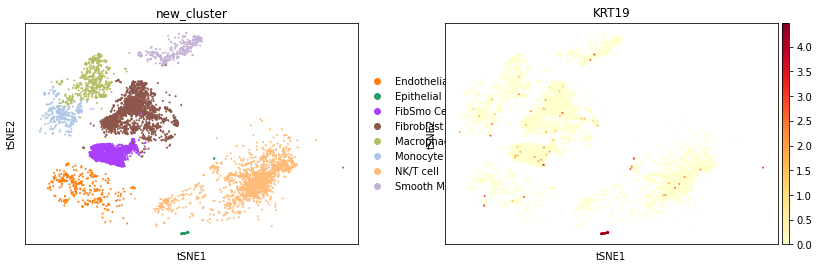

In [59]:
sc.pl.tsne(transcriptadata, color=['new_cluster','KRT19'],color_map='YlOrRd')


In [60]:
transcriptiondf=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
transcriptiondf

,Endothelial Cell_n,Endothelial Cell_p,Epithelial Cell_n,Epithelial Cell_p,FibSmo Cell_n,FibSmo Cell_p,Fibroblast_n,Fibroblast_p,Macrophage cell_n,Macrophage cell_p,Monocyte_n,Monocyte_p,NK/T cell_n,NK/T cell_p,Smooth Muscle Cell_n,Smooth Muscle Cell_p
0,CD74,3.124368e-151,KRT19,2.717826e-83,PLAT,0.000000e+00,MGP,0.000000e+00,TYROBP,4.707236e-234,LYZ,6.915659e-177,RPS27,0.0,MYL9,3.298584e-180
1,IFI27,8.042902e-150,S100P,2.077015e-79,MFAP4,0.000000e+00,GSN,0.000000e+00,HLA-DRA,5.416200e-227,TYROBP,5.176351e-166,RPL39,0.0,TAGLN,2.415027e-161
2,PLVAP,1.488991e-149,PSCA,4.420085e-78,ID1,0.000000e+00,CCDC80,0.000000e+00,CD74,3.858971e-223,S100A9,1.814725e-164,TMSB4X,0.0,ADIRF,3.477249e-161
3,IFITM2,3.272833e-142,MT-ND3,1.998883e-75,NR2F1,0.000000e+00,DCN,0.000000e+00,HLA-DRB1,1.375217e-213,SRGN,1.132631e-157,B2M,0.0,ACTA2,5.259430e-156
4,HLA-DRB1,3.656403e-142,AQP3,5.488862e-74,JUN,0.000000e+00,SFRP2,0.000000e+00,AIF1,1.118211e-210,S100A8,5.687927e-151,RPL28,0.0,TPM2,5.256959e-134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19428,LUM,1.629487e-64,IFITM2,6.592810e-43,TMSB4X,2.354786e-203,PFN1,6.770279e-200,DCN,7.698949e-98,ID3,7.384360e-70,SPARCL1,0.0,FTL,9.352853e-52
19429,S100A4,1.165272e-70,LGALS1,4.056033e-49,RPL39,8.487259e-206,SRGN,2.247768e-202,COL6A2,2.407113e-98,MALAT1,1.198798e-70,TIMP1,0.0,RPS12,3.634925e-52
19430,FTL,1.616325e-103,HLA-B,2.268541e-49,SH3BGRL3,1.458996e-217,HLA-B,1.594484e-237,LUM,2.263519e-101,IFITM1,5.776288e-73,CEBPD,0.0,FBLN1,2.089154e-52
19431,LGALS1,3.049753e-107,B2M,8.904783e-50,TMSB10,0.000000e+00,PTMA,1.334794e-283,SPARCL1,1.258427e-111,UBB,1.116485e-79,IFITM3,0.0,MMP2,3.470013e-53


In [ ]:
transcriptiondf.to_csv('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/transcription_wilcoxon_allpvalue.csv')

transcriptadata.write('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/expression_preprocessed.h5ad')

# Plot Venn picture

In [78]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [79]:
# get transform ID

transcriptadata=sc.read('/storage/yhhuang/users/ruiyan/15organ/SRR13075718/SRR13075718_transcription.h5ad')
transcriptadata

AnnData object with n_obs × n_vars = 7572 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster'
    var: 'gene_ids', 'feature_types'
    uns: 'new_cluster_colors'
    obsm: 'X_tsne'

In [80]:
transformdf=transcriptadata.var.copy()
transformdf

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


In [81]:
transformdf=transformdf[['gene_ids']]
transformdf

,gene_ids
MIR1302-2HG,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
AL627309.1,ENSG00000238009
AL627309.3,ENSG00000239945
...,...
AC233755.2,ENSG00000277856
AC233755.1,ENSG00000275063
AC240274.1,ENSG00000271254
AC213203.1,ENSG00000277475


In [82]:
transformdf.reset_index(inplace=True)
transformdf

,index,gene_ids
0,MIR1302-2HG,ENSG00000243485
1,FAM138A,ENSG00000237613
2,OR4F5,ENSG00000186092
3,AL627309.1,ENSG00000238009
4,AL627309.3,ENSG00000239945
...,...,...
33533,AC233755.2,ENSG00000277856
33534,AC233755.1,ENSG00000275063
33535,AC240274.1,ENSG00000271254
33536,AC213203.1,ENSG00000277475


In [83]:
# get venn plot

def get_venn_plot(cell):
    splicing=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/splicing_wilcoxon_allpvalue.csv',index_col=0)
    selectdf=splicing[[cell]].head(n=20)
    selectdf['gene_ids']=selectdf[cell].str.split('_',expand=True)[0]
    onecell=selectdf.merge(transformdf,on='gene_ids')
    print(onecell)
    splicingset=set(onecell['index'])
    
    expressiondf=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/transcription_wilcoxon_allpvalue.csv',index_col=0)
    topexpdf=expressiondf[[cell]].head(n=20)
    expset=set(topexpdf[cell])
    venn2([splicingset,expset], ('Splicing','Exp'))
    splicingset.difference(expset)
    expset.difference(splicingset)
    plt.title(cell.split('_n')[0])
    plt.show()
    print('splicing owned %s'%(splicingset.difference(expset)))
    print('expression owned %s'%(expset.difference(splicingset)))
    


In [84]:
expressiondf=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/transcription_wilcoxon_allpvalue.csv',index_col=0)
expressiondf

,Endothelial Cell_n,Endothelial Cell_p,Epithelial Cell_n,Epithelial Cell_p,FibSmo Cell_n,FibSmo Cell_p,Fibroblast_n,Fibroblast_p,Macrophage cell_n,Macrophage cell_p,Monocyte_n,Monocyte_p,NK/T cell_n,NK/T cell_p,Smooth Muscle Cell_n,Smooth Muscle Cell_p
0,CD74,3.124368e-151,KRT19,2.717826e-83,PLAT,0.000000e+00,MGP,0.000000e+00,TYROBP,4.707236e-234,LYZ,6.915659e-177,RPS27,0.0,MYL9,3.298584e-180
1,IFI27,8.042902e-150,S100P,2.077015e-79,MFAP4,0.000000e+00,GSN,0.000000e+00,HLA-DRA,5.416200e-227,TYROBP,5.176351e-166,RPL39,0.0,TAGLN,2.415027e-161
2,PLVAP,1.488991e-149,PSCA,4.420085e-78,ID1,0.000000e+00,CCDC80,0.000000e+00,CD74,3.858971e-223,S100A9,1.814725e-164,TMSB4X,0.0,ADIRF,3.477249e-161
3,IFITM2,3.272833e-142,MT-ND3,1.998883e-75,NR2F1,0.000000e+00,DCN,0.000000e+00,HLA-DRB1,1.375217e-213,SRGN,1.132631e-157,B2M,0.0,ACTA2,5.259430e-156
4,HLA-DRB1,3.656403e-142,AQP3,5.488862e-74,JUN,0.000000e+00,SFRP2,0.000000e+00,AIF1,1.118211e-210,S100A8,5.687927e-151,RPL28,0.0,TPM2,5.256959e-134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19428,LUM,1.629487e-64,IFITM2,6.592810e-43,TMSB4X,2.354786e-203,PFN1,6.770279e-200,DCN,7.698949e-98,ID3,7.384360e-70,SPARCL1,0.0,FTL,9.352853e-52
19429,S100A4,1.165272e-70,LGALS1,4.056033e-49,RPL39,8.487259e-206,SRGN,2.247768e-202,COL6A2,2.407113e-98,MALAT1,1.198798e-70,TIMP1,0.0,RPS12,3.634925e-52
19430,FTL,1.616325e-103,HLA-B,2.268541e-49,SH3BGRL3,1.458996e-217,HLA-B,1.594484e-237,LUM,2.263519e-101,IFITM1,5.776288e-73,CEBPD,0.0,FBLN1,2.089154e-52
19431,LGALS1,3.049753e-107,B2M,8.904783e-50,TMSB10,0.000000e+00,PTMA,1.334794e-283,SPARCL1,1.258427e-111,UBB,1.116485e-79,IFITM3,0.0,MMP2,3.470013e-53


In [85]:
cellls=[i for i in expressiondf.columns if '_n' in i]
cellls

['Endothelial Cell_n',
 'Epithelial Cell_n',
 'FibSmo Cell_n',
 'Fibroblast_n',
 'Macrophage cell_n',
 'Monocyte_n',
 'NK/T cell_n',
 'Smooth Muscle Cell_n']

                 Endothelial Cell_n         gene_ids     index
0            ENSG00000019582_newTSS  ENSG00000019582      CD74
1            ENSG00000196126_newTSS  ENSG00000196126  HLA-DRB1
2   ENSG00000131477_ENST00000253796  ENSG00000131477     RAMP2
3   ENSG00000185201_ENST00000602569  ENSG00000185201    IFITM2
4            ENSG00000198502_newTSS  ENSG00000198502  HLA-DRB5
5   ENSG00000204287_ENST00000395388  ENSG00000204287   HLA-DRA
6   ENSG00000276409_ENST00000622526  ENSG00000276409     CCL14
7            ENSG00000169908_newTSS  ENSG00000169908    TM4SF1
8            ENSG00000130300_newTSS  ENSG00000130300     PLVAP
9   ENSG00000064989_ENST00000479784  ENSG00000064989    CALCRL
10           ENSG00000231389_newTSS  ENSG00000231389  HLA-DPA1
11  ENSG00000178980_ENST00000599590  ENSG00000178980   SELENOW
12  ENSG00000185885_ENST00000408968  ENSG00000185885    IFITM1
13  ENSG00000107281_ENST00000488145  ENSG00000107281     NPDC1
14  ENSG00000152583_ENST00000503414  ENSG00000152583   

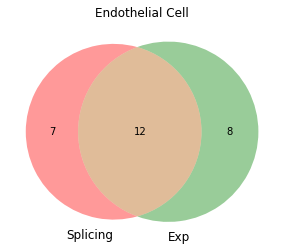

splicing owned {'HLA-E', 'ID1', 'IFITM1', 'HLA-DPA1', 'NPDC1', 'SELENOW', 'RAMP3'}
expression owned {'IFI27', 'AQP1', 'RNASE1', 'FKBP1A', 'VWF', 'CRIP2', 'EGFL7', 'IFITM3'}
                  Epithelial Cell_n         gene_ids     index
0            ENSG00000171345_newTSS  ENSG00000171345     KRT19
1   ENSG00000163993_ENST00000296370  ENSG00000163993     S100P
2   ENSG00000167653_ENST00000301258  ENSG00000167653      PSCA
3            ENSG00000165272_newTSS  ENSG00000165272      AQP3
4   ENSG00000176153_ENST00000557049  ENSG00000176153      GPX2
5   ENSG00000163435_ENST00000498017  ENSG00000163435      ELF3
6   ENSG00000089356_ENST00000604504  ENSG00000089356     FXYD3
7   ENSG00000167644_ENST00000589986  ENSG00000167644  C19orf33
8            ENSG00000115310_newTSS  ENSG00000115310      RTN4
9            ENSG00000189143_newTSS  ENSG00000189143     CLDN4
10  ENSG00000148671_ENST00000372013  ENSG00000148671     ADIRF
11  ENSG00000115457_ENST00000233809  ENSG00000115457    IGFBP2
12  ENSG

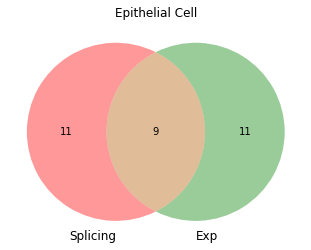

splicing owned {'ADIRF', 'KRT13', 'FABP5', 'GSTP1', 'KRT7', 'KRT18', 'SNCG', 'SPINT2', 'RTN4', 'CLDN4', 'MGST2'}
expression owned {'MT-CYB', 'TACSTD2', 'MT-CO1', 'MT-ND3', 'AGR2', 'MT-ND4L', 'S100A6', 'S100A11', 'MT-CO3', 'MT-CO2', 'MT-ND4'}
                      FibSmo Cell_n         gene_ids     index
0   ENSG00000125968_ENST00000376112  ENSG00000125968       ID1
1            ENSG00000004776_newTSS  ENSG00000004776     HSPB6
2   ENSG00000175899_ENST00000539638  ENSG00000175899       A2M
3   ENSG00000149591_ENST00000392951  ENSG00000149591     TAGLN
4            ENSG00000117318_newTSS  ENSG00000117318       ID3
5   ENSG00000104368_ENST00000220809  ENSG00000104368      PLAT
6   ENSG00000198832_ENST00000469262  ENSG00000198832   SELENOM
7            ENSG00000177606_newTSS  ENSG00000177606       JUN
8            ENSG00000166482_newTSS  ENSG00000166482     MFAP4
9   ENSG00000101335_ENST00000279022  ENSG00000101335      MYL9
10  ENSG00000175745_ENST00000327111  ENSG00000175745     NR2F1
11

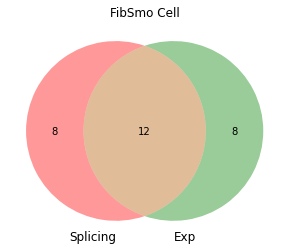

splicing owned {'GADD45B', 'TMEM176A', 'IFITM1', 'CIRBP', 'TPM2', 'COL6A1', 'MYL9', 'HMGN2'}
expression owned {'FOXF1', 'TCF21', 'PITX1', 'COL1A1', 'COL1A2', 'GADD45G', 'LUM', 'PLPP1'}
                       Fibroblast_n         gene_ids     index
0            ENSG00000111341_newTSS  ENSG00000111341       MGP
1   ENSG00000148180_ENST00000373818  ENSG00000148180       GSN
2            ENSG00000145423_newTSS  ENSG00000145423     SFRP2
3            ENSG00000143196_newTSS  ENSG00000143196       DPT
4   ENSG00000106333_ENST00000223061  ENSG00000106333    PCOLCE
5   ENSG00000167779_ENST00000548176  ENSG00000167779    IGFBP6
6   ENSG00000132386_ENST00000254722  ENSG00000132386  SERPINF1
7   ENSG00000091986_ENST00000475181  ENSG00000091986    CCDC80
8   ENSG00000101439_ENST00000398411  ENSG00000101439      CST3
9   ENSG00000149131_ENST00000340687  ENSG00000149131  SERPING1
10  ENSG00000182326_ENST00000543187  ENSG00000182326       C1S
11           ENSG00000125730_newTSS  ENSG00000125730       

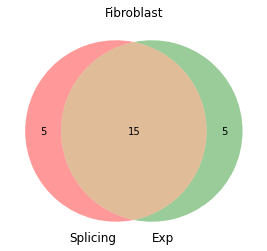

splicing owned {'HTRA1', 'LGALS3', 'NUPR1', 'CFD', 'GPX3'}
expression owned {'VIM', 'C1R', 'ADH1B', 'CLU', 'DCN'}
                  Macrophage cell_n         gene_ids     index
0   ENSG00000204472_ENST00000376059  ENSG00000204472      AIF1
1   ENSG00000158869_ENST00000289902  ENSG00000158869    FCER1G
2   ENSG00000204287_ENST00000395388  ENSG00000204287   HLA-DRA
3            ENSG00000011600_newTSS  ENSG00000011600    TYROBP
4            ENSG00000019582_newTSS  ENSG00000019582      CD74
5            ENSG00000196126_newTSS  ENSG00000196126  HLA-DRB1
6            ENSG00000231389_newTSS  ENSG00000231389  HLA-DPA1
7   ENSG00000173369_ENST00000509305  ENSG00000173369      C1QB
8   ENSG00000173372_ENST00000374642  ENSG00000173372      C1QA
9   ENSG00000159189_ENST00000374640  ENSG00000159189      C1QC
10  ENSG00000087086_ENST00000331825  ENSG00000087086       FTL
11  ENSG00000130066_ENST00000379251  ENSG00000130066      SAT1
12  ENSG00000122862_ENST00000242465  ENSG00000122862      SRGN
13  

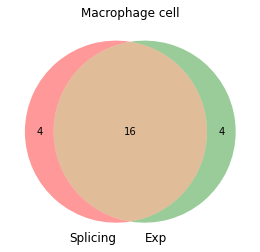

splicing owned {'VAMP8', 'NPC2', 'HLA-DQA1', 'TMSB10'}
expression owned {'LAPTM5', 'CD83', 'MS4A6A', 'HLA-DQB1'}
                         Monocyte_n         gene_ids     index
0   ENSG00000090382_ENST00000549690  ENSG00000090382       LYZ
1   ENSG00000158869_ENST00000289902  ENSG00000158869    FCER1G
2   ENSG00000142669_ENST00000270792  ENSG00000142669  SH3BGRL3
3   ENSG00000130066_ENST00000379251  ENSG00000130066      SAT1
4            ENSG00000011600_newTSS  ENSG00000011600    TYROBP
5   ENSG00000122862_ENST00000242465  ENSG00000122862      SRGN
6   ENSG00000087086_ENST00000331825  ENSG00000087086       FTL
7   ENSG00000204472_ENST00000376059  ENSG00000204472      AIF1
8            ENSG00000103187_newTSS  ENSG00000103187     COTL1
9   ENSG00000163220_ENST00000368738  ENSG00000163220    S100A9
10  ENSG00000109321_ENST00000395748  ENSG00000109321      AREG
11  ENSG00000104904_ENST00000581150  ENSG00000104904      OAZ1
12  ENSG00000204482_ENST00000376096  ENSG00000204482      LST1
13   

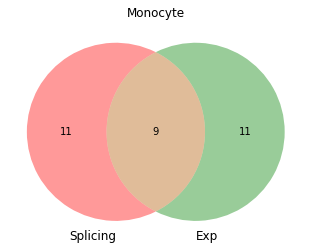

splicing owned {'TSPO', 'EMP3', 'H3F3A', 'AREG', 'TMSB10', 'AIF1', 'FTH1', 'SERPINA1', 'OAZ1', 'LST1', 'CXCL2'}
expression owned {'FCN1', 'NEAT1', 'PLAUR', 'BCL2A1', 'S100A8', 'MT-CO1', 'CYBB', 'CTSS', 'VCAN', 'MT-CO3', 'NAMPT'}
                        NK/T cell_n         gene_ids    index
0   ENSG00000008517_ENST00000532247  ENSG00000008517     IL32
1   ENSG00000198851_ENST00000529713  ENSG00000198851     CD3E
2            ENSG00000158050_newTSS  ENSG00000158050    DUSP2
3   ENSG00000169442_ENST00000492808  ENSG00000169442     CD52
4   ENSG00000157514_ENST00000503515  ENSG00000157514  TSC22D3
5            ENSG00000152518_newTSS  ENSG00000152518  ZFP36L2
6   ENSG00000122862_ENST00000242465  ENSG00000122862     SRGN
7            ENSG00000110848_newTSS  ENSG00000110848     CD69
8   ENSG00000168685_ENST00000506850  ENSG00000168685     IL7R
9            ENSG00000108518_newTSS  ENSG00000108518     PFN1
10  ENSG00000101608_ENST00000585090  ENSG00000101608   MYL12A
11  ENSG00000177954_ENST000

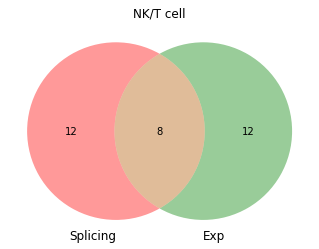

splicing owned {'IL7R', 'CD69', 'MYL12A', 'CCL4', 'SRGN', 'PFN1', 'CD7', 'PTPRC', 'TSC22D3', 'SARAF', 'CD3E', 'DUSP2'}
expression owned {'RPS15A', 'RPL28', 'RPS12', 'CCL5', 'RPS29', 'HLA-B', 'TMSB4X', 'RPL39', 'RPLP1', 'RPS27A', 'CXCR4', 'RPL30'}
               Smooth Muscle Cell_n         gene_ids     index
0   ENSG00000101335_ENST00000279022  ENSG00000101335      MYL9
1   ENSG00000148671_ENST00000372013  ENSG00000148671     ADIRF
2   ENSG00000149591_ENST00000392951  ENSG00000149591     TAGLN
3   ENSG00000140416_ENST00000561425  ENSG00000140416      TPM1
4            ENSG00000198467_newTSS  ENSG00000198467      TPM2
5            ENSG00000163453_newTSS  ENSG00000163453    IGFBP7
6   ENSG00000106211_ENST00000248553  ENSG00000106211     HSPB1
7   ENSG00000122786_ENST00000430085  ENSG00000122786     CALD1
8   ENSG00000125868_ENST00000449141  ENSG00000125868      DSTN
9   ENSG00000142910_ENST00000271064  ENSG00000142910   TINAGL1
10  ENSG00000187479_ENST00000617612  ENSG00000187479  C11orf

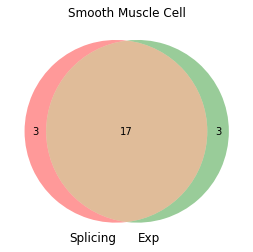

splicing owned {'MT1M', 'SOD3', 'HES4'}
expression owned {'CAV1', 'CSRP1', 'ACTA2'}


In [86]:
for celltype in cellls:
    get_venn_plot(celltype)
    

# plot example 

In [87]:
splicingadata=sc.read('/storage/yhhuang/users/ruiyan/15organ/fig2_supp/splicing_preprocessed.h5ad')
splicingadata

AnnData object with n_obs × n_vars = 7424 × 9671
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.orig', 'seurat_clusters', 'Color_of_tissues', 'Cell_type_in_each_tissue', 'tSNE_1', 'tSNE_2', 'Cell_type_in_merged_data', 'new_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'new_cluster_colors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

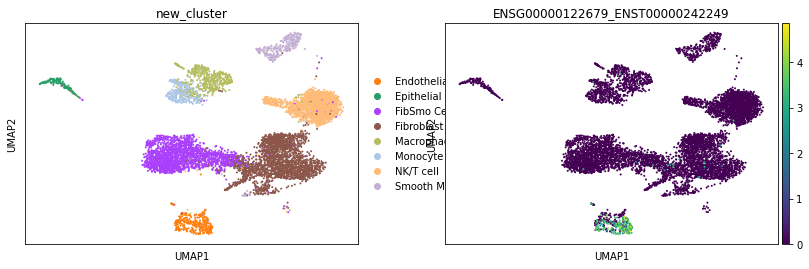

In [88]:
sc.pl.umap(splicingadata,color=['new_cluster','ENSG00000122679_ENST00000242249'])


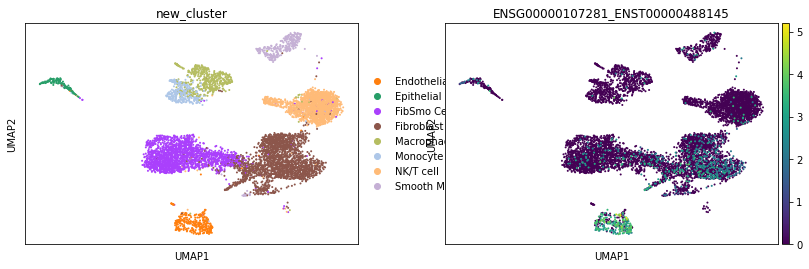

In [94]:
sc.pl.umap(splicingadata,color=['new_cluster','ENSG00000107281_ENST00000488145'])